In [65]:
#To make these codes to work apply these:
#Enter to channels from Anaconda Navigator. Add "www.conda.anaconda.org".
#Run Anaconda Power Shell as admin.
#Download python3 and pip (if you have them already,no need to re-download).
#Download tensorflow library with "pip install tensorflow" command in Anaconda Power Shell.
#Download the keras library with "pip install keras" command in Anaconda Power Shell.

In [66]:
#The problem:
#Build an ANN structure by using MNIST train data to predict the MNIST handwritten digits.
#You will use MNIST test data to evaluate your trained ANN structure in terms of 
#evaluation metrics that are accuracy and F1 score.
#Train your ANN structure with activation functions that are sigmoid, ReLU, and tanh separately.
#Use the same activation functions in hidden layer and output layer for your ANN structure. 
#Add the convergence curve of your ANN structure along iterations.
#Explain your ANN structure in terms of the included number of neurons in hidden layer and output layer.
#Explain which value of learning rate is used for your ANN structure.
#Explain which activation function provides the highest or the lowest classification performance

In [67]:
#Keras is used for quickly experimenting with deep neural networks
import numpy as np #For matrix operations
import matplotlib.pyplot as plt #For plotting to the screen
from keras.layers import Dense, Flatten #For layers in our model
from keras.models import Sequential #For modeling ann
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist #We upload our csv train and test files from keras

In [68]:
# Load MNIST handwritten digit data from keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [69]:
# Convert y_train into one-hot format
#One-hot encoding: change the values as they are 
#either 1 or 0 to work with categorical data directly
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
    
y_train = np.array(temp)

In [70]:
# Convert y_test into one-hot format 
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))

y_test = np.array(temp)

In [71]:
#Since Keras 2.0, legacy evaluation metrics – F-score, precision and recall – have been removed from the ready-to-use list.
#Users have to define these metrics themselves.
#We define f1 score for evaluation metric
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [72]:
#We will create 3 different models seperately
# with using sigmoid,ReLu and tanh functions
#to compare each one of them with others

#For Sigmoid
# Create simple Neural Network model
model1 = Sequential()
model1.add(Flatten(input_shape=(28,28)))
model1.add(Dense(5, activation='sigmoid'))
model1.add(Dense(10, activation='sigmoid'))

model1.summary()

model1.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 5)                 3925      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [73]:
#For Sigmoid
# Train the Neural Network model
history1 = model1.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))
#Our model works for 5 times and sets its values by backpropagation

Epoch 1/5
1875/1875 [==============================] - 2s 870us/step - loss: 1.8182 - acc: 0.4310 - val_loss: 1.2845 - val_acc: 0.6010
Epoch 2/5
1875/1875 [==============================] - 1s 749us/step - loss: 1.1783 - acc: 0.6409 - val_loss: 1.0039 - val_acc: 0.6819
Epoch 3/5
1875/1875 [==============================] - 2s 808us/step - loss: 0.9868 - acc: 0.6838 - val_loss: 0.9027 - val_acc: 0.7151
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.9005 - acc: 0.7201 - val_loss: 0.8314 - val_acc: 0.7340
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8632 - acc: 0.7271 - val_loss: 0.8225 - val_acc: 0.7272


In [74]:
#For Sigmoid
# Making predictions using our trained model
predictions = model1.predict(X_test)
predictions = np.argmax(predictions, axis=1)

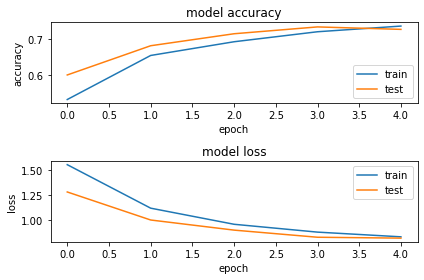

In [75]:
#For Sigmoid
# plotting the convergence curve
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

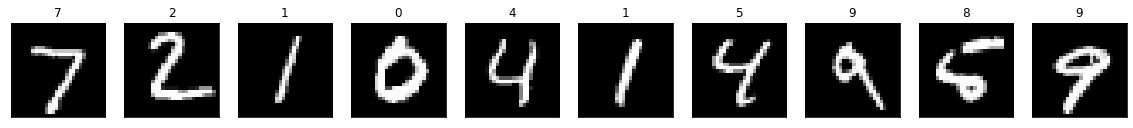

In [76]:
#For Sigmoid
# Display predictions on test data for
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

In [77]:
#For ReLu
# Create simple Neural Network model
model2 = Sequential()
model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(5, activation='relu'))
model2.add(Dense(10, activation='relu'))

model2.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

In [78]:
#For ReLu
# Train the Neural Network model
history2 = model2.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))
#Our model works for 5 times and sets its values by backpropagation

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 2.6450 - acc: 0.3384 - val_loss: 1.4344 - val_acc: 0.5515
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3769 - acc: 0.5565 - val_loss: 1.3997 - val_acc: 0.5432
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3551 - acc: 0.5476 - val_loss: 1.2918 - val_acc: 0.6238
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: nan - acc: 0.6098 - val_loss: nan - val_acc: 0.0980
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: nan - acc: 0.0981 - val_loss: nan - val_acc: 0.0980


In [79]:
#For ReLu
# Making predictions using our trained model
predictions = model2.predict(X_test)
predictions = np.argmax(predictions, axis=1)

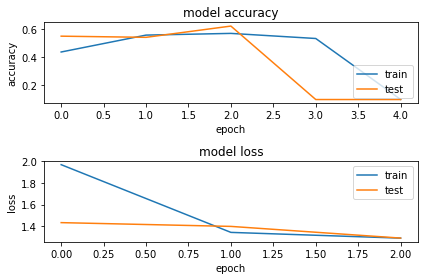

In [80]:
#For ReLu
# plotting the convergence curve
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

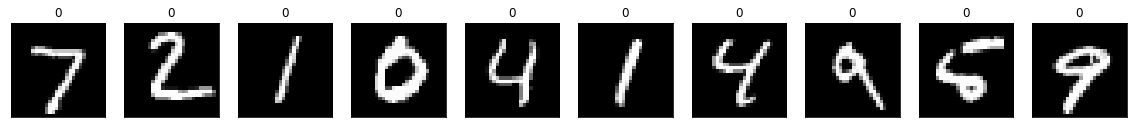

In [81]:
#For ReLu
# Display predictions on test data for
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

In [82]:
#For tanh
# Create simple Neural Network model
model3 = Sequential()
model3.add(Flatten(input_shape=(28,28)))
model3.add(Dense(5, activation='tanh'))
model3.add(Dense(10, activation='tanh'))

model3.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

In [83]:
#For tanh
# Train the Neural Network model
history3 = model3.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))
#Our model works for 5 times and sets its values by backpropagation

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 6.5392 - acc: 0.1020 - val_loss: 8.7149 - val_acc: 0.1257
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 7.0415 - acc: 0.1254 - val_loss: 6.9469 - val_acc: 0.1567
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 7.0332 - acc: 0.1742 - val_loss: 6.9134 - val_acc: 0.1824
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 6.6993 - acc: 0.1912 - val_loss: 7.2129 - val_acc: 0.1963
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 6.7680 - acc: 0.1987 - val_loss: 7.4518 - val_acc: 0.1917


In [84]:
#For tanh
# Making predictions using our trained model
predictions = model3.predict(X_test)
predictions = np.argmax(predictions, axis=1)

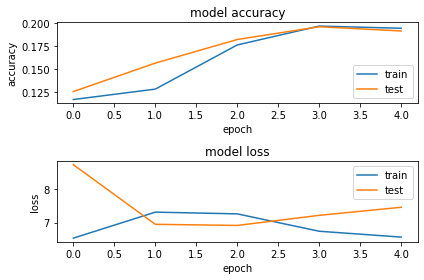

In [85]:
#For tanh
# plotting the convergence curve
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

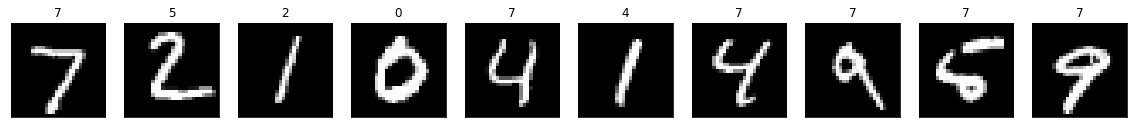

In [86]:
#For ReLu
# Display predictions on test data for
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

In [87]:
#Summary:

#Our study shows that tanh is failing, sigmoid is succeeding and reLu #is somewhere between. But in theory, this should not be like this.
#There must be an error but I could not find it.

#tanh is superior than sigmoid always. ReLu and tanh perform different depend on the model.
#ReLu is commonly prefered because it is lot easier to understand and apply especially for deep learning(multi layer ann).

#tanh is a logistic function. The range of the tanh function is from (-1 to 1).
#Advantage of the tanh : Negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero.
#The range of ReLu is from (0 to infinity).
#Advantage of the ReLu: Activation is sparse and efficient.
#ReLu should only be used within Hidden layers of a Neural Network Model.I used at at hidden and output layer and it failed.

#In the model the learning rate a is 0,01 default value.
#All three models has 3 layers. Inputs are 28x28. Hidden layers have 5 neurons and output layers have 10 neurons.